In [13]:
import pandas as pd
import os
import numpy as np

from sqlalchemy import create_engine

In [14]:
path_to_db = 'telecomm_csi.db'
path_to_db1 = '/datasets/telecomm_csi.db'

if os.path.exists(path_to_db):
    engine = create_engine(f'sqlite:///{path_to_db}', echo = False)
else:
    engine = create_engine(f'sqlite:///{path_to_db1}', echo = False)

In [15]:
#engine = create_engine(f'sqlite:///{path_to_db1}', echo = False)

In [16]:
query = """
SELECT u.user_id,
       u.lt_day,
       CASE
           WHEN nps_score < 7 THEN 'detractors' 
           WHEN nps_score >= 7 and nps_score <= 8 THEN 'passives'
           ELSE 'promoters'
       END AS nps_group,
       u.age,
       CAST (gender_segment AS varchar) AS gender_segment,
       u.os_name,
       u.cpe_type_name,
       l.country,
       l.city,
       SUBSTR(a.title, 4) AS age_segment,
       SUBSTR(t.title, 4) AS traffic_segment,
       SUBSTR(ls.title, 4) AS lifetime_segment,
       u.nps_score,
       CASE
           WHEN lt_day <= 365 THEN 'new'
           ELSE 'old'
       END AS is_new
FROM user AS u
INNER JOIN location AS l ON u.location_id = l.location_id
INNER JOIN age_segment AS a ON u.age_gr_id = a.age_gr_id
INNER JOIN traffic_segment AS t ON u.tr_gr_id = t.tr_gr_id
INNER JOIN lifetime_segment AS ls ON u.lt_gr_id = ls.lt_gr_id;
"""

In [17]:
df = pd.read_sql(query, engine)
df.head(3)

,user_id,lt_day,nps_group,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,is_new
0,A001A2,2320,promoters,45.0,1.0,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,old
1,A001WF,2344,promoters,53.0,0.0,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,old
2,A003Q7,467,promoters,57.0,0.0,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,old


In [18]:
df.to_csv('telecomm_csi_tableau.csv', index=False)

### Укажите ссылку на дашборд на сайте Tableau Public:

https://public.tableau.com/views/project2_16590356001730/Dashboard3?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

lifetime_segment                   1     13-24         2     25-36         3  \
gender_segment age_segment                                                     
0.0            16-24             NaN  0.059398  0.182390 -0.030520  0.211240   
               25-34        0.000000  0.153785  0.285943  0.087561  0.291468   
               35-44        0.333333  0.308812  0.371588  0.217884  0.400000   
               45-54        1.000000  0.376032  0.536913  0.311503  0.493590   
               55-64        1.000000  0.427167  0.393548  0.392430  0.540146   
               66 +              NaN  0.473451  0.673913  0.387205  0.696970   
               n/a          0.000000 -0.333333 -1.000000 -1.000000       NaN   
               до 16             NaN  0.041096  0.000000 -0.092308  0.357143   
1.0            16-24             NaN  0.087361  0.245045  0.019798  0.236111   
               25-34        1.000000  0.214059  0.316308  0.145153  0.359766   
               35-44        0.333333  0.332435  0.450846  0.277917  0.431775   
               45-54        1.000000  0.438341  0.516770  0.360275  0.584877   
               55-64             NaN  0.518766  0.644828  0.475520  0.555066   
               66 +              NaN  0.565394  0.540000  0.559633  0.531915   
               n/a          1.000000  0.500000       NaN -0.333333       NaN   
               до 16             NaN  0.017857  0.500000  0.076923  0.111111   

lifetime_segment                 36+       4-6      7-12  
gender_segment age_segment                                
0.0            16-24       -0.104258  0.205832  0.186634  
               25-34       -0.042019  0.274569  0.237321  
               35-44        0.100904  0.375661  0.368573  
               45-54        0.223342  0.417763  0.448566  
               55-64        0.334850  0.572482  0.469546  
               66 +         0.437282  0.573913  0.544444  
               n/a         -0.538462 -0.500000 -1.000000  
               до 16       -0.286765  0.058824  0.000000  
1.0            16-24       -0.065762  0.271100  0.164977  
               25-34        0.027744  0.319668  0.291300  
               35-44        0.175038  0.449479  0.390759  
               45-54        0.300104  0.546698  0.484736  
               55-64        0.417602  0.584660  0.583396  
               66 +         0.536269  0.537143  0.640898  
               n/a         -0.285714       NaN  1.000000  
               до 16       -0.106383  0.222222  0.200000

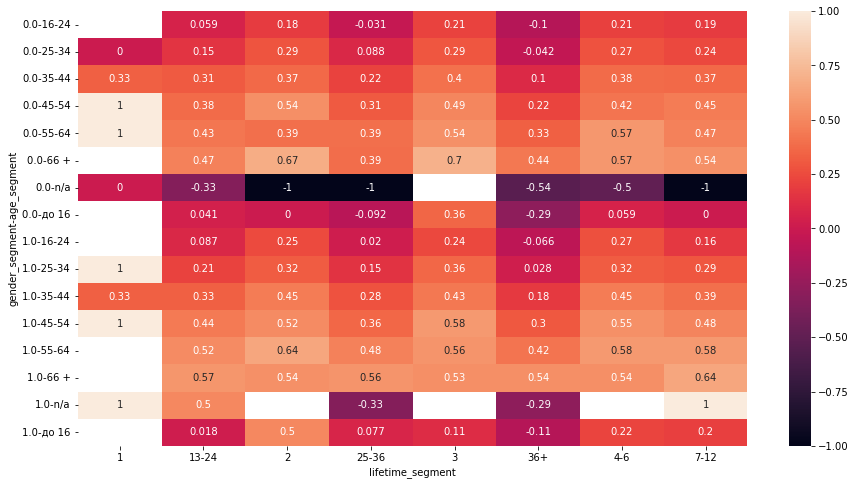

In [19]:
# Код ревьюера
import seaborn as sns
import matplotlib.pyplot as plt
d = df.assign(total_nps=lambda row: row['nps_group'].map({'promoters': 1, 'passives': 0, 'detractors': -1}))\
  .pivot_table(index=['gender_segment', 'age_segment'], columns=['lifetime_segment'], values='total_nps', aggfunc='mean')
display(d)
plt.figure(figsize=(15,8))
sns.heatmap(d, annot=True);

### Укажите ссылку на pdf-файл с презентацией:

https://disk.yandex.ru/d/1qtnfdI4QIOzjA